In [1]:
import pandas as pd

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns
import sklearn.metrics as metrics
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [2]:
path = r'C:\Madhan\Analytics\Machine_Learning_project_work\Great_Lakes_AIML\Capstone\consumer-court-models\src\Data\m2-gl-models'

In [3]:
df = pd.read_csv(path+'\m2_Data_2019-03-29_15-26-56_wordified_with_state.csv')

In [4]:
df.head()

,index,HTML_File_Name,Complaint_Text,Verdict,State
0,0,Delhi-CC_361_2018-2018-04-17.html,CC_DELHI complainant come forward allegation a...,Dismissed,Delhi
1,1,Delhi-CC_352_2017-2017-04-17.html,CC_DELHI shri vimal kumar chandna filed compla...,Dismissed,Delhi
2,2,Delhi-CC_13_504-2017-03-14.html,CC_DELHI case complainant booked apartment vri...,Dismissed,Delhi
3,3,Delhi-CC_143_2017-2017-02-20.html,CC_DELHI sh. subrata kumar dash smt. subita da...,Dismissed,Delhi
4,4,Delhi-CC_245_2015-2018-07-09.html,"CC_DELHI sh. dharmendra singh, resident loni, ...",Won,Delhi


In [5]:
df.shape

(2120, 5)

In [6]:
df.Verdict.value_counts()

Won              1374
Dismissed         414
Partially Won     289
Transferred        24
Settled            14
Withdrawn           5
Name: Verdict, dtype: int64

In [7]:
df = df.loc[(df['Verdict'] == 'Won') | (df['Verdict'] == 'Dismissed') | (df['Verdict'] == 'Partially Won')]

In [8]:
df.Verdict.value_counts()

Won              1374
Dismissed         414
Partially Won     289
Name: Verdict, dtype: int64

In [9]:
df.Verdict.replace(['Partially Won'], ['Won'], inplace=True)

In [10]:
df.shape

(2077, 5)

In [11]:
df.Verdict.value_counts()

Won          1663
Dismissed     414
Name: Verdict, dtype: int64

In [12]:
df.State.value_counts()

NCDRC           556
Chandigarh      490
West_Bengal     478
Delhi           324
Telangana       220
Chhattisgarh      7
Maharashtra       2
Name: State, dtype: int64

### Summaries

NCRDC

In [13]:
Ncrdc_summ = df.loc[df['State'] == 'NCDRC'].Verdict.value_counts(normalize=True)
Ncdrc_summ_pd = pd.DataFrame(Ncrdc_summ)
Ncdrc_summ_pd = Ncdrc_summ_pd.rename(columns={'Verdict':'NCDRC'})
print(Ncdrc_summ_pd)

              NCDRC
Won        0.816547
Dismissed  0.183453


Chandigarh

In [14]:
Chand_summ = df.loc[df['State'] == 'Chandigarh'].Verdict.value_counts(normalize=True)
Chand_summ_pd = pd.DataFrame(Chand_summ)
Chand_summ_pd = Chand_summ_pd.rename(columns={'Verdict':'Chand'})
print(Chand_summ_pd)

              Chand
Won        0.944898
Dismissed  0.055102


West Bengal

In [15]:
wb_summ = df.loc[df['State'] == 'West_Bengal'].Verdict.value_counts(normalize=True)
wb_summ_pd = pd.DataFrame(wb_summ)
wb_summ_pd = wb_summ_pd.rename(columns={'Verdict':'WB'})
print(wb_summ_pd)

                 WB
Won        0.805439
Dismissed  0.194561


Delhi

In [16]:
Del_summ = df.loc[df['State'] == 'Delhi'].Verdict.value_counts(normalize=True)
Del_summ_pd = pd.DataFrame(Del_summ)
Del_summ_pd = Del_summ_pd.rename(columns={'Verdict':'Delhi'})
print(Del_summ_pd)

              Delhi
Dismissed  0.533951
Won        0.466049


Telan

In [17]:
Telang_summ = df.loc[df['State'] == 'Telangana'].Verdict.value_counts(normalize=True)
Telg_summ_pd = pd.DataFrame(Telang_summ)
Telg_summ_pd = Telg_summ_pd.rename(columns={'Verdict':'Telangana'})
print(Telg_summ_pd)

           Telangana
Won         0.936364
Dismissed   0.063636


In [18]:
Chhat_summ = df.loc[df['State'] == 'Chhattisgarh'].Verdict.value_counts(normalize=True)
Chhat_summ_pd = pd.DataFrame(Chhat_summ)
Chhat_summ_pd = Chhat_summ_pd.rename(columns={'Verdict':'Chattis'})
print(Chhat_summ_pd)

            Chattis
Dismissed  0.571429
Won        0.428571


In [19]:
Maha_summ = df.loc[df['State'] == 'Maharashtra'].Verdict.value_counts(normalize=True)
Maha_summ_pd = pd.DataFrame(Maha_summ)
Maha_summ_pd = Maha_summ_pd.rename(columns=({'Verdict':'Maha'}))
print(Maha_summ_pd)

           Maha
Won         0.5
Dismissed   0.5


In [20]:
summaries = pd.concat([Ncdrc_summ_pd,Chand_summ_pd,wb_summ_pd,Del_summ_pd,Telg_summ_pd,Chhat_summ_pd,Maha_summ_pd],axis=1)

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [21]:
summaries = summaries.transpose()

In [22]:
summaries.columns

Index(['Dismissed', 'Won'], dtype='object')

In [23]:
summaries

,Dismissed,Won
NCDRC,0.183453,0.816547
Chand,0.055102,0.944898
WB,0.194561,0.805439
Delhi,0.533951,0.466049
Telangana,0.063636,0.936364
Chattis,0.571429,0.428571
Maha,0.500000,0.500000


In [24]:
summaries.transpose()

,NCDRC,Chand,WB,Delhi,Telangana,Chattis,Maha
Dismissed,0.183453,0.055102,0.194561,0.533951,0.063636,0.571429,0.5
Won,0.816547,0.944898,0.805439,0.466049,0.936364,0.428571,0.5


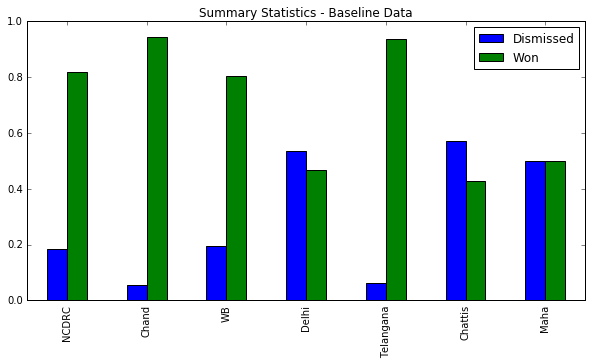

In [25]:
ax = summaries.plot(kind='bar',figsize=(10,5),title='Summary Statistics - Baseline Data')

In [26]:
df.head()

,index,HTML_File_Name,Complaint_Text,Verdict,State
0,0,Delhi-CC_361_2018-2018-04-17.html,CC_DELHI complainant come forward allegation a...,Dismissed,Delhi
1,1,Delhi-CC_352_2017-2017-04-17.html,CC_DELHI shri vimal kumar chandna filed compla...,Dismissed,Delhi
2,2,Delhi-CC_13_504-2017-03-14.html,CC_DELHI case complainant booked apartment vri...,Dismissed,Delhi
3,3,Delhi-CC_143_2017-2017-02-20.html,CC_DELHI sh. subrata kumar dash smt. subita da...,Dismissed,Delhi
4,4,Delhi-CC_245_2015-2018-07-09.html,"CC_DELHI sh. dharmendra singh, resident loni, ...",Won,Delhi


In [27]:
df.reset_index(inplace=True)

In [28]:
df.State.isna().value_counts()

False    2077
Name: State, dtype: int64

In [29]:
df.iloc[550:555]

,level_0,index,HTML_File_Name,Complaint_Text,Verdict,State
550,550,550,NCDRC-CC_773_2016-2018-02-09.html,CC_NCDRC complainant booked residential flat o...,Won,NCDRC
551,551,551,NCDRC-CC_793_2015-2017-01-31.html,CC_NCDRC complainant matter allottees resident...,Won,NCDRC
552,553,553,NCDRC-CC_92_2017-2017-11-22.html,CC_NCDRC complainant namely raman seth wife ra...,Won,NCDRC
553,555,555,NCDRC-CC_963_2015-2016-05-02.html,CC_NCDRC complainant matter booked one villa o...,Won,NCDRC
554,556,556,Telangana-CC_174_2015-2017-02-17.html,"CC_TELANGANA case complainant brief, opposite ...",Won,Telangana


In [30]:
df.columns

Index(['level_0', 'index', 'HTML_File_Name', 'Complaint_Text', 'Verdict',
       'State'],
      dtype='object')

In [31]:
df.drop('index',1,inplace=True)

In [32]:
df.drop('level_0',1,inplace=True)

In [33]:
df.columns

Index(['HTML_File_Name', 'Complaint_Text', 'Verdict', 'State'], dtype='object')

In [34]:
X = df.Complaint_Text

In [35]:
y = df.Verdict

In [36]:
X[552]

"CC_NCDRC complainant namely raman seth wife ranjana seth booked residential flat opposite party project namely 'unitech grande' opposite party developing sector 96, noida. flat no. 2601 tower-3 aforesaid project allotted total consideration AMOUNT_CRORES_OF_RUPEES . vide letter dated 14.8.2010. possession, per clause term condition allotment delivered within thirty month thereof, meaning thereby possession ought delivered 12.2.2013. grievance complainant possession offered despite already paid sum AMOUNT_CRORES_OF_RUPEES  opposite party. complainant therefore commission, seeking refund entire amount paid them, along compensation etc."

In [37]:
corpus = []
words = []
for i in range(len(X)):
    #sent = X[i].splitlines()
    #sent = [s for s in sent if not re.search(r'[0-9]',s)]
    #sent = [s for s in sent if len(s)>0]
    #sentences = re.sub('[^a-zA-Z]',' ',str(sent))
    sentences = X[i].lower()
    sentences = sentences.split()
    lm = WordNetLemmatizer()
    sentences = [lm.lemmatize(word) for word in sentences if not word in set(stopwords.words('english')) and len(word)>2]
    words+= sentences
    sentences = ' '.join(sentences)
    corpus.append(sentences)
    if (i % 500) == 0:
        print('500 lines completed')
#print(coprus)

500 lines completed
500 lines completed
500 lines completed
500 lines completed
500 lines completed


In [38]:
len(corpus)

2077

In [39]:
y.shape

(2077,)

In [40]:
df_corpus = pd.DataFrame(corpus,columns=['text'])

In [41]:
df_corpus.shape

(2077, 1)

In [42]:
df_corpus.columns

Index(['text'], dtype='object')

In [43]:
df.Verdict.shape

(2077,)

In [44]:
df_cleaned = pd.concat([df_corpus,df['Verdict'],df['State']],axis=1)

In [45]:
df_cleaned.shape

(2077, 3)

In [46]:
df_cleaned.count()

text       2077
Verdict    2077
State      2077
dtype: int64

In [47]:
X = df_cleaned.text

In [48]:
X[100]

'cc_delhi complainant stated complaint m/s omaxelimited (in short op) floated scheme allotment shop/atm space/showroom/food court/ commercial space commercial complex named "omaxe connaught place" located beta-ii, greater noida distt. gautambudh nagar up. complainant applied allotment shop aforesaid commercial complex earning livelihood mean self-employment. vide allotment letter dated 29.01.2007 allotted complainant shop bearing no. 131, measuring 219.30 sq. ft. located ground floor. per agreement physical possession shop handed complainant within period thirty month date letter allotment. complainant made payment term letter allotment. 20.12.2008, amount amount_tens_of_lakhs_of_rupees stood paid op. sale consideration paid time handing possession. complainant stated ready willing pay balance sale consideration. grievance complainant visited office several time requested issuance letter payment balance amount total cost. simply gave false assurances. complainant sent letter dated 19.0

### Building Model with All data

In [49]:
df_cleaned['Stateenc'] = df_cleaned["State"].values
le = preprocessing.LabelEncoder()
le.fit(df.State)

print("ENCODED CLASSES : {}".format(le.classes_))
df_cleaned['Stateenc'] = le.transform(df_cleaned.Stateenc)

print(df_cleaned.Stateenc.value_counts())
print(df_cleaned.State.value_counts())

ENCODED CLASSES : ['Chandigarh' 'Chhattisgarh' 'Delhi' 'Maharashtra' 'NCDRC' 'Telangana'
 'West_Bengal']
4    556
0    490
6    478
2    324
5    220
1      7
3      2
Name: Stateenc, dtype: int64
NCDRC           556
Chandigarh      490
West_Bengal     478
Delhi           324
Telangana       220
Chhattisgarh      7
Maharashtra       2
Name: State, dtype: int64


In [50]:
df_cleaned['Labelenc'] = df_cleaned["Verdict"].values
le = preprocessing.LabelEncoder()
le.fit(df.Verdict)

print("ENCODED CLASSES : {}".format(le.classes_))
df_cleaned['Labelenc'] = le.transform(df_cleaned.Labelenc)

print(df_cleaned.Labelenc.value_counts())
print(df_cleaned.Verdict.value_counts())

ENCODED CLASSES : ['Dismissed' 'Won']
1    1663
0     414
Name: Labelenc, dtype: int64
Won          1663
Dismissed     414
Name: Verdict, dtype: int64


In [51]:
y = df_cleaned.Labelenc

In [52]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [53]:
getdumm = pd.get_dummies(df_cleaned.Stateenc)

In [54]:
X_train_txt, X_test_txt, y_train, y_test, = train_test_split(X, y,test_size=0.2, random_state=1)

In [55]:
print(X_train_txt.shape)
print(X_test_txt.shape)
print(y_train.shape)
print(y_test.shape)

(1661,)
(416,)
(1661,)
(416,)


In [56]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,4),lowercase=True,min_df=10,max_features=7000)
X_dtm_train = tfidf_vec.fit_transform((X_train_txt))
X_dtm_train.shape

(1661, 7000)

In [57]:
X_dtm_test = tfidf_vec.transform(X_test_txt)
X_dtm_test.shape

(416, 7000)

In [58]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [59]:
svcclassifier = SVC(random_state=0,kernel='linear')
svcclassifier.fit(X_dtm_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
svcclassifier.score(X_dtm_train,y_train)

0.9578567128236002

In [61]:
y_pred_svm = svcclassifier.predict(X_dtm_test)

In [62]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_dtm_train,y_train)
y_pred_class_logreg = logreg.predict(X_dtm_test)

In [63]:
X_train_tokens = tfidf_vec.get_feature_names()

In [64]:
len(X_train_tokens)

7000

In [66]:
log_coef = logreg.coef_

In [67]:
type(log_coef)

numpy.ndarray

In [68]:
log_coef

array([[17.43994799, -0.79775566,  9.74434739, ...,  0.31870557,
         0.10299706,  2.06533069]])

In [71]:
top_positive_coefficients = np.argsort(log_coef)[-20:]
top_negative_coefficients = np.argsort(log_coef)[:20]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])


In [72]:
top_positive_coefficients.reshape(-1,1)

array([[4378],
       [2663],
       [2863],
       ...,
       [1478],
       [4117],
       [3042]], dtype=int64)

In [73]:
X_train_tokens[6991]

'years opposite'

In [76]:
nb = MultinomialNB()
nb.fit(X_dtm_train,y_train)
y_pred_class_nb = nb.predict(X_dtm_test)

In [77]:
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [78]:
error = []
# Calculating error for K values for 5, 13 and 21
for i in range(1,49):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_dtm_train, y_train)
    pred_i = knn.predict(X_dtm_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

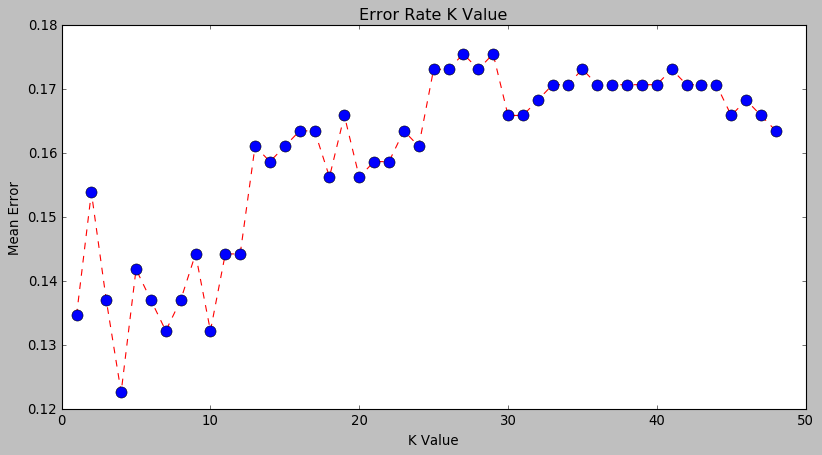

In [79]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1,49), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_dtm_train,y_train)
y_pred_class_knn = knn.predict(X_dtm_test)

In [81]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100,class_weight={0:.7,1:.3}, min_samples_leaf=15)
classifier.fit(X_dtm_train,y_train)
y_pred_tree = classifier.predict(X_dtm_test)

In [82]:
from sklearn.ensemble import RandomForestClassifier
rand_classifer = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rand_classifer.fit(X_dtm_train,y_train)
y_pred_randforest = rand_classifer.predict(X_dtm_test)

In [83]:
print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
print('SVM CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_svm))
print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm,average=None))
print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm,average=None))
print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm,average=None))
print("===> **SVM ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_svm,average=None))
print("##################################################################################################")
print("LogisticReg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_logreg,))
print('LogisticReg CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_logreg))
print("===> **LogisticReg F1 SCORE",metrics.f1_score(y_test, y_pred_class_logreg,average=None))
print("===> **LogisticReg Recall SCORE",metrics.recall_score(y_test, y_pred_class_logreg,average=None))
print("===> **LogisticReg Precision SCORE",metrics.precision_score(y_test, y_pred_class_logreg,average=None))
print("===> **LogisticReg ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_logreg,average=None))
print("##################################################################################################")
print("NaiveBayes ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_nb))
print('NaiveBayes CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_nb))
print("===> **NaiveBayes F1 SCORE",metrics.f1_score(y_test, y_pred_class_nb,average=None))
print("===> **NaiveBayes Recall SCORE",metrics.recall_score(y_test, y_pred_class_nb,average=None))
print("===> **NaiveBayes Precision SCORE",metrics.precision_score(y_test, y_pred_class_nb,average=None))
print("===> **NaiveBayes ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_nb,average=None))
print("##################################################################################################")
print("KNN ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_knn))
print('KNN CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_knn))
print("===> **KNN F1 SCORE",metrics.f1_score(y_test, y_pred_class_knn,average=None))
print("===> **KNN Recall SCORE",metrics.recall_score(y_test, y_pred_class_knn,average=None))
print("===> **KNN Precision SCORE",metrics.precision_score(y_test, y_pred_class_knn,average=None))
print("===> **KNN ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_knn,average=None))
print("##################################################################################################")
print("Dtree ACCURACY:",metrics.accuracy_score(y_test,y_pred_tree))
print('Dtree CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_tree))
print("===> **Dtree F1 SCORE",metrics.f1_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Recall SCORE",metrics.recall_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Precision SCORE",metrics.precision_score(y_test, y_pred_tree,average=None))
print("===> **Dtree ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_tree,average=None))
print("##################################################################################################")
print("RandForest ACCURACY:",metrics.accuracy_score(y_test,y_pred_randforest))
print('RandForest CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_randforest))
print("===> **RandForest F1 SCORE",metrics.f1_score(y_test, y_pred_randforest,average=None))
print("===> **RandForest Recall SCORE",metrics.recall_score(y_test, y_pred_randforest,average=None))
print("===> **RandForest Precision SCORE",metrics.precision_score(y_test, y_pred_randforest,average=None))
print("===> **RandForest ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_randforest,average=None))

SVM ACCURACY: 0.9014423076923077
SVM CLASSIFIER CONFUSTION MATRIX: col_0      0    1
Labelenc         
0         50   30
1         11  325
===> **SVM F1 SCORE [0.70921986 0.9406657 ]
===> **SVM Recall SCORE [0.625     0.9672619]
===> **SVM Precision SCORE [0.81967213 0.91549296]
===> **SVM ROC_AUC SCORE 0.7961309523809523
##################################################################################################
LogisticReg ACCURACY: 0.8990384615384616
LogisticReg CLASSIFIER CONFUSTION MATRIX: col_0      0    1
Labelenc         
0         53   27
1         15  321
===> **LogisticReg F1 SCORE [0.71621622 0.93859649]
===> **LogisticReg Recall SCORE [0.6625     0.95535714]
===> **LogisticReg Precision SCORE [0.77941176 0.92241379]
===> **LogisticReg ROC_AUC SCORE 0.8089285714285714
##################################################################################################
NaiveBayes ACCURACY: 0.8798076923076923
NaiveBayes CLASSIFIER CONFUSTION MATRIX: col_0      0    1
Label

## Cross Validation

In [84]:
models = [
    RandomForestClassifier(n_estimators=200, random_state=0),
    LinearSVC(),
    LogisticRegression(random_state=0),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
re = []
pre = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_dtm_train, y_train, scoring='accuracy', cv=CV)
    recalls = cross_val_score(model, X_dtm_train, y_train, scoring='recall', cv=CV,)
    precisions = cross_val_score(model, X_dtm_train, y_train, scoring='precision', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    for rec, recall in enumerate(recalls):
        re.append((model_name,rec,recall))
    for prec, preci in enumerate(precisions):
        pre.append((model_name,prec,preci))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [85]:
cv_df_precision = pd.DataFrame(pre, columns=['model_name', 'fold_idx', 'precision_score'])

In [86]:
cv_df_recall = pd.DataFrame(re, columns=['model_name', 'fold_idx', 'recall_score'])

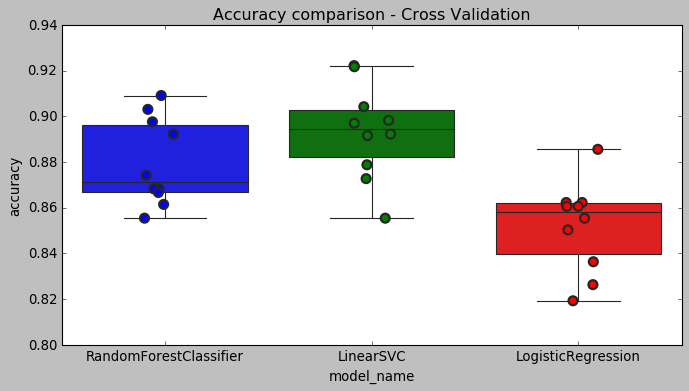

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='model_name', y='accuracy', data=cv_df).set_title("Accuracy comparison - Cross Validation")
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

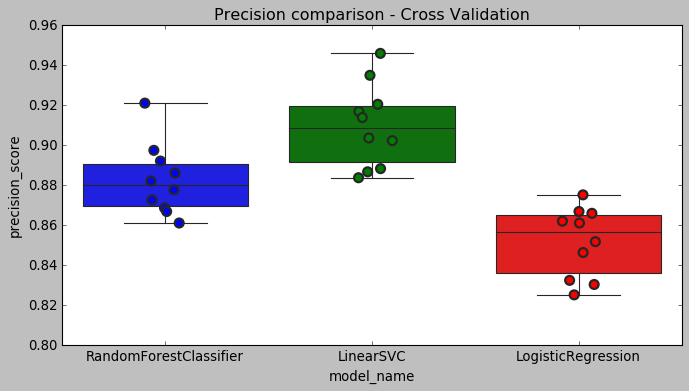

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='model_name', y='precision_score', data=cv_df_precision).set_title("Precision comparison - Cross Validation")
sns.stripplot(x='model_name', y='precision_score', data=cv_df_precision, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

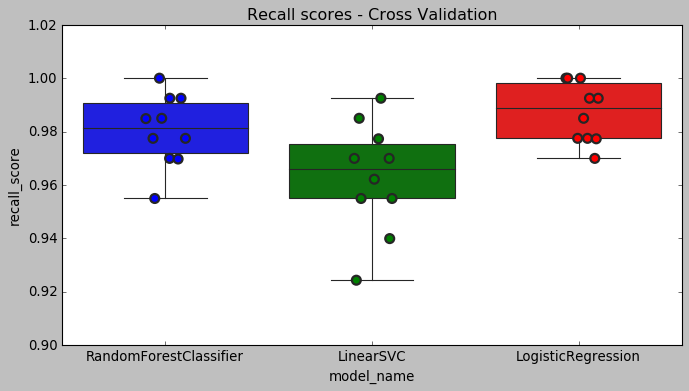

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='model_name', y='recall_score', data=cv_df_recall).set_title("Recall scores - Cross Validation")
sns.stripplot(x='model_name', y='recall_score', data=cv_df_recall, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [90]:
from sklearn.ensemble import BaggingClassifier

In [91]:
bgcl = BaggingClassifier( n_estimators=100) 

In [92]:
bgcl.fit(X_dtm_train,y_train)
y_pred_bgcl = bgcl.predict(X_dtm_test)

In [93]:
print("BGCL ACCURACY:",metrics.accuracy_score(y_test,y_pred_bgcl))
print('BGCL CLASSIFIER CONFUSTION MATRIX:%\n',pd.crosstab(y_test,y_pred_bgcl))
print("===> **BGCL F1 SCORE",metrics.f1_score(y_test, y_pred_bgcl,average=None))
print("===> **BGCL Recall SCORE",metrics.recall_score(y_test, y_pred_bgcl,average=None))
print("===> **BGCL Precision SCORE",metrics.precision_score(y_test, y_pred_bgcl,average=None))
print("===> **BGCL ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_bgcl,average=None))

BGCL ACCURACY: 0.8990384615384616
BGCL CLASSIFIER CONFUSTION MATRIX:%
 col_0      0    1
Labelenc         
0         50   30
1         12  324
===> **BGCL F1 SCORE [0.70422535 0.93913043]
===> **BGCL Recall SCORE [0.625      0.96428571]
===> **BGCL Precision SCORE [0.80645161 0.91525424]
===> **BGCL ROC_AUC SCORE 0.7946428571428572


In [94]:
bgcl.score(X_dtm_train,y_train)

0.9987959060806743

In [95]:
bgcl.score(X_dtm_test,y_test)

0.8990384615384616

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.3, max_depth=10)
gbcl = gbcl.fit(X_dtm_train, y_train)

In [97]:
y_pred_gbcl = gbcl.predict(X_dtm_test)

In [98]:
print("GBC: ACCURACY:",metrics.accuracy_score(y_test,y_pred_gbcl))
print('GBC CLASSIFIER CONFUSTION MATRIX:%\n',pd.crosstab(y_test,y_pred_gbcl))
print("===> **GBC F1 SCORE",metrics.f1_score(y_test, y_pred_gbcl,average=None))
print("===> **GBC Recall SCORE",metrics.recall_score(y_test, y_pred_gbcl,average=None))
print("===> **GBC Precision SCORE",metrics.precision_score(y_test, y_pred_gbcl,average=None))
print("===> **GBC ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_gbcl,average=None))

GBC: ACCURACY: 0.8966346153846154
GBC CLASSIFIER CONFUSTION MATRIX:%
 col_0      0    1
Labelenc         
0         49   31
1         12  324
===> **GBC F1 SCORE [0.69503546 0.93777135]
===> **GBC Recall SCORE [0.6125     0.96428571]
===> **GBC Precision SCORE [0.80327869 0.91267606]
===> **GBC ROC_AUC SCORE 0.7883928571428572


## Pipeline

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.grid_search import GridSearchCV

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [100]:
svcclassifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
X = df_cleaned.text
y = df_cleaned.Labelenc
X_train_txt, X_test_txt, y_train, y_test, = train_test_split(X, y,test_size=0.2, random_state=1)

In [102]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', SVC()),])
parameters = {
    'tfidf__min_df': (10,20,30,40,50),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),(1,4),(1,5),(1,6),(1,7)],
    'tfidf__max_features': (5000,6000,7000,8000),
    'clf__C':(1,2,3,4,5,6,7,8,9,10),
    'clf__kernel': ('poly','rbf','linear')
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(X_train_txt, y_train)
print(grid_search_tune.score(X_train_txt,y_train))

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 2 folds for each of 4200 candidates, totalling 8400 fits


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  9.2min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed: 18.7min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed: 32.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 60.0min
[Parallel(n_jobs=2)]: Done 1148 tasks      | elapsed: 73.5min
[Parallel(n_jobs=2)]: Done 1564 tasks      | elapsed: 89.7min
[Parallel(n_jobs=2)]: Done 2044 tasks      | elapsed: 108.4min
[Parallel(n_jobs=2)]: Done 2588 tasks      | elapsed: 134.8min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed: 163.1min
[Parallel(n_jobs=2)]: Done 3868 tasks      | elapsed: 197.3min
[Parallel(n_jobs=2)]: Done 4604 tasks      | elapsed: 231.9min
[Parallel(n_jobs=2)]: Done 5404 tasks      | elapsed: 266.0min
[Parallel(n_jobs=2)]: Done 6268 tasks      | elapsed: 297.7min
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed: 332.0min
[Parallel(n_jobs=2)]: Done 8188 tasks      | elapsed: 372.9min
[Par

0.946417820590006
Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=40,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]


In [118]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,4),lowercase=True,min_df=40,max_features=5000)
X_dtm_train = tfidf_vec.fit_transform((X_train_txt))
X_dtm_train.shape

(1661, 3296)

In [119]:
X_dtm_test = tfidf_vec.transform(X_test_txt)

In [120]:
from sklearn.decomposition import TruncatedSVD

In [121]:
svd = TruncatedSVD(n_components=1000)

In [122]:
tfidfnew = svd.fit(X_dtm_train)

In [123]:
var = tfidfnew.explained_variance_ratio_

In [124]:
sortedvar = np.sort(var)[::-1]

In [125]:
sortedvar.cumsum()

array([0.05430009, 0.09495762, 0.12843717, 0.15275786, 0.1739165 ,
       0.19029097, 0.20497833, 0.21911467, 0.23241833, 0.24441942,
       0.25590526, 0.26515679, 0.27393432, 0.28250829, 0.29072115,
       0.29853163, 0.30585445, 0.31263341, 0.31924939, 0.32572781,
       0.33206063, 0.33821352, 0.34412661, 0.34987403, 0.35552372,
       0.36086534, 0.36609291, 0.37125399, 0.37630463, 0.38125189,
       0.38618568, 0.39096922, 0.3956863 , 0.40021948, 0.40466635,
       0.40897336, 0.41312165, 0.41725026, 0.42129467, 0.42527402,
       0.42919835, 0.43302502, 0.43674304, 0.44039865, 0.44398375,
       0.44749825, 0.45090928, 0.45427529, 0.45760265, 0.46087817,
       0.46407565, 0.46722672, 0.47033997, 0.47340406, 0.4764238 ,
       0.47942676, 0.48241371, 0.48533958, 0.48823781, 0.4911074 ,
       0.49392082, 0.49671247, 0.49947585, 0.50219766, 0.50488972,
       0.50756276, 0.51019285, 0.51280584, 0.51536519, 0.51792163,
       0.52044896, 0.52296315, 0.52543208, 0.52788182, 0.53031

Text(0.5,1,'Cummulative Variance - Singular Value Decomposition')

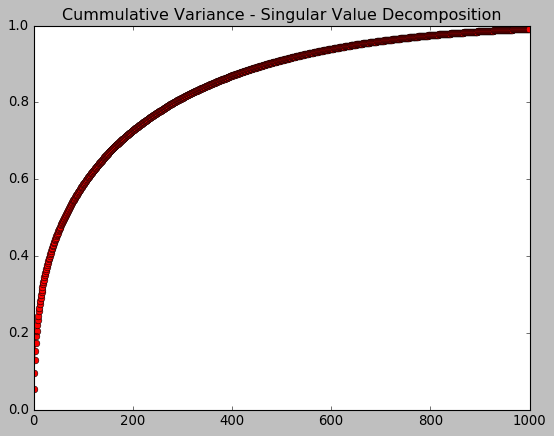

In [126]:
plt.plot(sortedvar.cumsum(),marker='o',color='red')
plt.title('Cummulative Variance - Singular Value Decomposition')

In [112]:
X_dtm_train_new = tfidfnew.fit_transform(X_dtm_train)

In [127]:
svcclassifier = SVC(random_state=0,kernel='linear',C=1)
svcclassifier.fit(X_dtm_train_new,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [128]:
svcclassifier.score(X_dtm_train_new,y_train)

0.9458157736303432

In [129]:
X_dtm_test_new = tfidfnew.transform(X_dtm_test)

In [130]:
y_pred_svm = svcclassifier.predict(X_dtm_test_new)

In [131]:
print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
print('SVM CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_svm))
print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm,average=None))
print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm,average=None))
print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm,average=None))
print("===> **SVM ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_svm,average=None))

SVM ACCURACY: 0.90625
SVM CLASSIFIER CONFUSTION MATRIX: col_0      0    1
Labelenc         
0         51   29
1         10  326
===> **SVM F1 SCORE [0.72340426 0.94356006]
===> **SVM Recall SCORE [0.6375    0.9702381]
===> **SVM Precision SCORE [0.83606557 0.91830986]
===> **SVM ROC_AUC SCORE 0.8038690476190476


## Downsampling Approach

In [132]:
df_cleaned.head()

,text,Verdict,State,Stateenc,Labelenc
0,cc_delhi complainant come forward allegation a...,Dismissed,Delhi,2,0
1,cc_delhi shri vimal kumar chandna filed compla...,Dismissed,Delhi,2,0
2,cc_delhi case complainant booked apartment vri...,Dismissed,Delhi,2,0
3,cc_delhi sh. subrata kumar dash smt. subita da...,Dismissed,Delhi,2,0
4,"cc_delhi sh. dharmendra singh, resident loni, ...",Won,Delhi,2,1


In [133]:
df.Verdict.value_counts()

Won          1663
Dismissed     414
Name: Verdict, dtype: int64

In [134]:
1663*0.4

665.2

In [135]:
won = df_cleaned[df_cleaned['Verdict']=='Won'].sample(666,random_state=1,replace=False)

In [136]:
won_1 = df_cleaned[df_cleaned['Verdict']=='Won'].sample(666,random_state=2,replace=False)
won_2 = df_cleaned[df_cleaned['Verdict']=='Won'].sample(666,random_state=3,replace=False)
won_3 = df_cleaned[df_cleaned['Verdict']=='Won'].sample(666,random_state=4,replace=False)
won_4 = df_cleaned[df_cleaned['Verdict']=='Won'].sample(666,random_state=5,replace=False)

In [137]:
won.shape

(666, 5)

In [138]:
dis = df_cleaned[df_cleaned['Verdict']=='Dismissed']

In [139]:
dis.shape

(414, 5)

In [140]:
df_sampled = pd.concat([won,dis],axis=0)
df_sampled_1 = pd.concat([won_1,dis],axis=0)
df_sampled_2 = pd.concat([won_2,dis],axis=0)
df_sampled_3 = pd.concat([won_3,dis],axis=0)
df_sampled_4 = pd.concat([won_4,dis],axis=0)

In [141]:
df_sampled_1.shape

(1080, 5)

In [142]:
df_sampled_1.head()

,text,Verdict,State,Stateenc,Labelenc
1950,cc_west_bengal instant complaint section consu...,Won,West_Bengal,6,1
267,"cc_ncdrc cc/155/2016 complainants, namely, ms....",Won,NCDRC,4,1
249,cc_ncdrc complainant husband wife booked resid...,Won,NCDRC,4,1
1243,cc_chandigarh complainant husband wife. case w...,Won,Chandigarh,0,1
756,cc_west_bengal instant complaint section consu...,Won,West_Bengal,6,1


In [143]:
df_sampled_1.State.value_counts()

NCDRC           277
West_Bengal     247
Delhi           231
Chandigarh      223
Telangana        96
Chhattisgarh      5
Maharashtra       1
Name: State, dtype: int64

In [144]:
X = df_sampled_1.text

In [145]:
y = df_sampled_1.Verdict

In [146]:
df_sampled_1['Labelenc'] = df_sampled_1["Verdict"].values
le = preprocessing.LabelEncoder()
le.fit(df.Verdict)

print("ENCODED CLASSES : {}".format(le.classes_))
df_sampled_1['Labelenc'] = le.transform(df_sampled_1.Labelenc)

print(df_sampled_1.Labelenc.value_counts())
print(df_sampled_1.Verdict.value_counts())

ENCODED CLASSES : ['Dismissed' 'Won']
1    666
0    414
Name: Labelenc, dtype: int64
Won          666
Dismissed    414
Name: Verdict, dtype: int64


In [147]:
y_enc = df_sampled_1.Labelenc

In [148]:
X_train_txt, X_test_txt, y_train, y_test, = train_test_split(X, y_enc,test_size=0.2, random_state=1)

In [149]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,4),lowercase=True,min_df=30,max_features=5000)
X_dtm_train = tfidf_vec.fit_transform((X_train_txt))
X_dtm_train.shape

(864, 1875)

In [150]:
X_dtm_test = tfidf_vec.transform(X_test_txt)
X_dtm_test.shape

(216, 1875)

In [151]:
svcclassifier = SVC(random_state=0,kernel='linear',C=3)
svcclassifier.fit(X_dtm_train,y_train)
y_pred_svm = svcclassifier.predict(X_dtm_test)

In [152]:
print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
print('SVM CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_svm))
print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm,average=None))
print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm,average=None))
print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm,average=None))
print("===> **SVM ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_svm,average=None))

SVM ACCURACY: 0.8379629629629629
SVM CLASSIFIER CONFUSTION MATRIX: col_0      0    1
Labelenc         
0         58   20
1         15  123
===> **SVM F1 SCORE [0.76821192 0.87544484]
===> **SVM Recall SCORE [0.74358974 0.89130435]
===> **SVM Precision SCORE [0.79452055 0.86013986]
===> **SVM ROC_AUC SCORE 0.8174470457079153


In [153]:
def build_models(X_train,y_train,X_test,y_test):
    svcclassifier = SVC(random_state=0,kernel='linear',C=3)
    svcclassifier.fit(X_dtm_train,y_train)
    y_pred_svm = svcclassifier.predict(X_dtm_test)
    print("SVM Fitted")
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_dtm_train,y_train)
    y_pred_class_logreg = logreg.predict(X_dtm_test)
    print("Logreg Fitted")
    #nb = MultinomialNB()
    #nb.fit(X_dtm_train,y_train)
    #y_pred_class_nb = nb.predict(X_dtm_test)
    #print("Naive Bayes Fitted")
    #classifier = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100,class_weight={0:.7,1:.3}, min_samples_leaf=15)
    #classifier.fit(X_dtm_train,y_train)
    #y_pred_tree = classifier.predict(X_dtm_test)
    #print("DTree Fitted")
    rand_classifer = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    rand_classifer.fit(X_dtm_train,y_train)
    y_pred_randforest = rand_classifer.predict(X_dtm_test)
    print("Random Forest Fitted")
    print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
    print('SVM CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_svm))
    print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm,average=None))
    print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm,average=None))
    print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm,average=None))
    print("===> **SVM ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_svm,average=None))
    print("##################################################################################################")
    print("LogisticReg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_logreg,))
    print('LogisticReg CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_logreg))
    print("===> **LogisticReg F1 SCORE",metrics.f1_score(y_test, y_pred_class_logreg,average=None))
    print("===> **LogisticReg Recall SCORE",metrics.recall_score(y_test, y_pred_class_logreg,average=None))
    print("===> **LogisticReg Precision SCORE",metrics.precision_score(y_test, y_pred_class_logreg,average=None))
    print("===> **LogisticReg ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_logreg,average=None))
    print("##################################################################################################")
    print("RandForest ACCURACY:",metrics.accuracy_score(y_test,y_pred_randforest))
    print('RandForest CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_randforest))
    print("===> **RandForest F1 SCORE",metrics.f1_score(y_test, y_pred_randforest,average=None))
    print("===> **RandForest Recall SCORE",metrics.recall_score(y_test, y_pred_randforest,average=None))
    print("===> **RandForest Precision SCORE",metrics.precision_score(y_test, y_pred_randforest,average=None))
    print("===> **RandForest ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_randforest,average=None))
    return

In [154]:
build_models(X_train_txt,y_train,X_test_txt,y_test)

SVM Fitted
Logreg Fitted
Random Forest Fitted
SVM ACCURACY: 0.8379629629629629
SVM CLASSIFIER CONFUSTION MATRIX: col_0      0    1
Labelenc         
0         58   20
1         15  123
===> **SVM F1 SCORE [0.76821192 0.87544484]
===> **SVM Recall SCORE [0.74358974 0.89130435]
===> **SVM Precision SCORE [0.79452055 0.86013986]
===> **SVM ROC_AUC SCORE 0.8174470457079153
##################################################################################################
LogisticReg ACCURACY: 0.8287037037037037
LogisticReg CLASSIFIER CONFUSTION MATRIX: col_0      0    1
Labelenc         
0         60   18
1         19  119
===> **LogisticReg F1 SCORE [0.76433121 0.86545455]
===> **LogisticReg Recall SCORE [0.76923077 0.86231884]
===> **LogisticReg Precision SCORE [0.75949367 0.86861314]
===> **LogisticReg ROC_AUC SCORE 0.8157748049052397
##################################################################################################
RandForest ACCURACY: 0.8518518518518519
RandForest CLASS

In [155]:
df_sampled.head()

,text,Verdict,State,Stateenc,Labelenc
1483,"cc_ncdrc saurabh sood, complainant herein book...",Won,NCDRC,4,1
1194,"cc_telangana case complainant brief, opposite ...",Won,Telangana,5,1
826,"cc_chandigarh facts, brief, complainant initia...",Won,Chandigarh,0,1
1015,cc_chandigarh complainant resident jalandhar. ...,Won,Chandigarh,0,1
1811,cc_west_bengal instant complaint section (inad...,Won,West_Bengal,6,1


In [156]:
def build_model_samples(s,df):
    SVM_f1 = []
    SVM_recall = []
    logreg_f1 = []
    rf_f1 = []
    logreg_recall = []
    rf_recall = []
    for sam in range(s):
        won = df_cleaned[df_cleaned['Verdict']=='Won'].sample(666,random_state=sam,replace=False)
        dis = df_cleaned[df_cleaned['Verdict']=='Dismissed']
        df_sampled = pd.concat([won,dis],axis=0)
        X = df_sampled.text
        y = df_sampled.Labelenc
        X_train_txt, X_test_txt, y_train, y_test, = train_test_split(X, y_enc,test_size=0.2, random_state=1)
        X_dtm_train = tfidf_vec.fit_transform((X_train_txt))
        X_dtm_test = tfidf_vec.transform(X_test_txt)
        print(X_dtm_train.shape)
        print(X_dtm_test.shape)
        svcclassifier = SVC(random_state=0,kernel='linear',C=3)
        svcclassifier.fit(X_dtm_train,y_train)
        y_pred_svm = svcclassifier.predict(X_dtm_test)
        SVM_f1.append(metrics.f1_score(y_test, y_pred_svm,average=None))
        SVM_recall.append(metrics.recall_score(y_test, y_pred_svm,average=None))
        print("SVM Fitted for sample",sam)
        logreg.fit(X_dtm_train,y_train)
        y_pred_class_logreg = logreg.predict(X_dtm_test)
        logreg_f1.append(metrics.f1_score(y_test, y_pred_class_logreg,average=None))
        logreg_recall.append(metrics.recall_score(y_test, y_pred_class_logreg,average=None))
        print("Logreg Fitted for sample",sam)
        rand_classifer = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
        rand_classifer.fit(X_dtm_train,y_train)
        y_pred_randforest = rand_classifer.predict(X_dtm_test)
        rf_f1.append(metrics.f1_score(y_test, y_pred_randforest,average=None))
        rf_recall.append(metrics.recall_score(y_test, y_pred_randforest,average=None))
        print("RF Fitted for sample",sam)
    return SVM_recall, SVM_f1, logreg_recall,logreg_f1,rf_recall,rf_f1

In [157]:
output = build_model_samples(10,df_cleaned)

(864, 1950)
(216, 1950)
SVM Fitted for sample 0
Logreg Fitted for sample 0
RF Fitted for sample 0
(864, 1878)
(216, 1878)
SVM Fitted for sample 1
Logreg Fitted for sample 1
RF Fitted for sample 1
(864, 1875)
(216, 1875)
SVM Fitted for sample 2
Logreg Fitted for sample 2
RF Fitted for sample 2
(864, 1883)
(216, 1883)
SVM Fitted for sample 3
Logreg Fitted for sample 3
RF Fitted for sample 3
(864, 1950)
(216, 1950)
SVM Fitted for sample 4
Logreg Fitted for sample 4
RF Fitted for sample 4
(864, 1833)
(216, 1833)
SVM Fitted for sample 5
Logreg Fitted for sample 5
RF Fitted for sample 5
(864, 1790)
(216, 1790)
SVM Fitted for sample 6
Logreg Fitted for sample 6
RF Fitted for sample 6
(864, 1858)
(216, 1858)
SVM Fitted for sample 7
Logreg Fitted for sample 7
RF Fitted for sample 7
(864, 1902)
(216, 1902)
SVM Fitted for sample 8
Logreg Fitted for sample 8
RF Fitted for sample 8
(864, 1671)
(216, 1671)
SVM Fitted for sample 9
Logreg Fitted for sample 9
RF Fitted for sample 9


In [158]:
SVM_recall = pd.DataFrame(output[0],columns=['Dismissed','Won'])
SVM_F1 = pd.DataFrame(output[1],columns=['Dismissed','Won'])
logreg_recall = pd.DataFrame(output[2],columns=['Dismissed','Won'])
logreg_F1 = pd.DataFrame(output[3],columns=['Dismissed','Won'])
RF_recall = pd.DataFrame(output[4],columns=['Dismissed','Won'])
RF_F1 = pd.DataFrame(output[5],columns=['Dismissed','Won'])

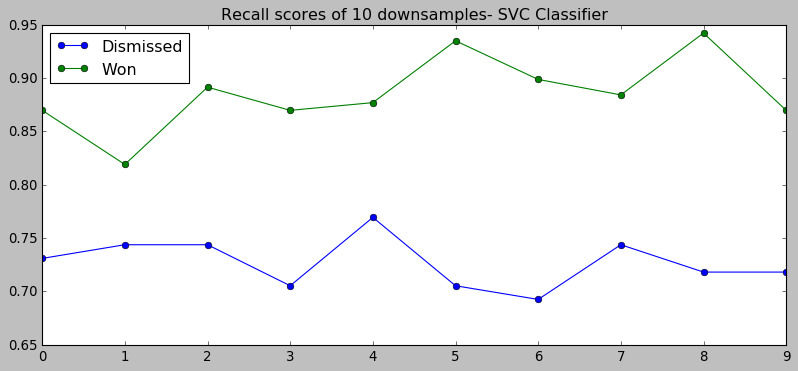

In [159]:
SVM_recall.plot(figsize=(12,5),title='Recall scores of 10 downsamples- SVC Classifier',marker='o')

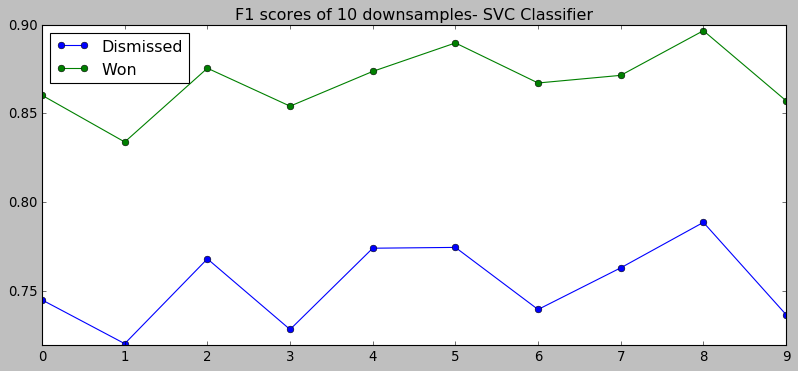

In [160]:
SVM_F1.plot(figsize=(12,5),title='F1 scores of 10 downsamples- SVC Classifier',marker='o')

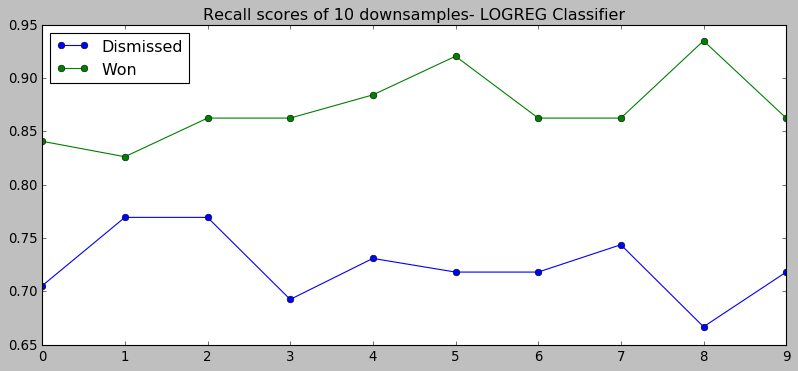

In [161]:
logreg_recall.plot(figsize=(12,5),title='Recall scores of 10 downsamples- LOGREG Classifier',marker='o')

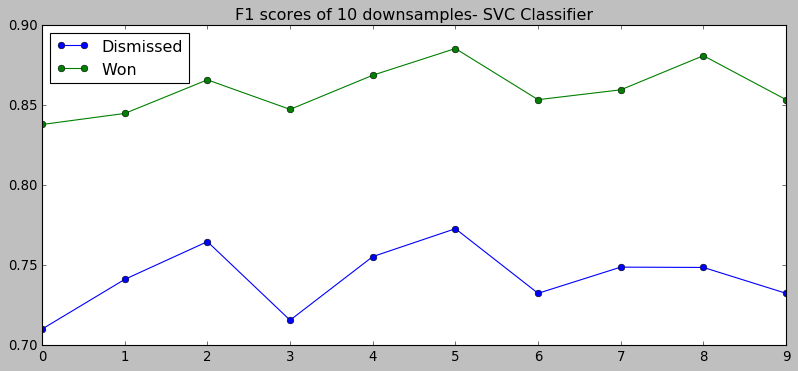

In [162]:
logreg_F1.plot(figsize=(12,5),title='F1 scores of 10 downsamples- SVC Classifier',marker='o')

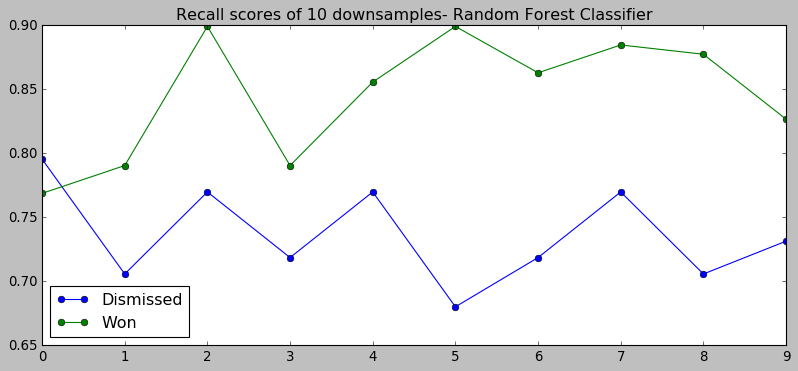

In [163]:
RF_recall.plot(figsize=(12,5),title='Recall scores of 10 downsamples- Random Forest Classifier',marker='o')

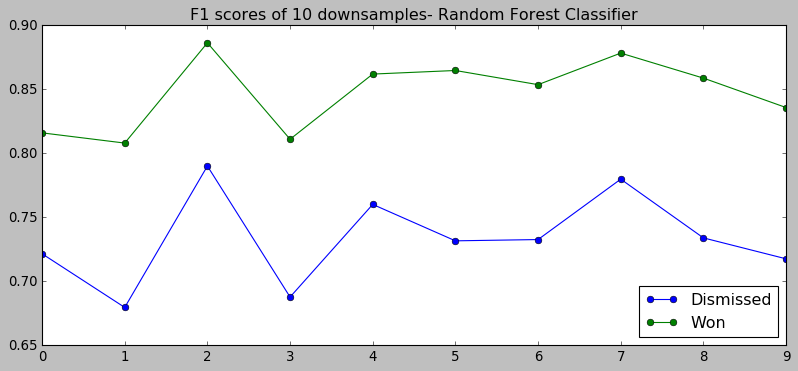

In [164]:
RF_F1.plot(figsize=(12,5),title='F1 scores of 10 downsamples- Random Forest Classifier',marker='o')

### Building Vocab words with Importance Ratios

In [165]:
X_train_tokens = tfidf_vec.get_feature_names()
len(X_train_tokens)

1671

In [167]:
coef = svcclassifier.coef_
#nb.feature_count_

In [168]:
coef

<1x1875 sparse matrix of type '<class 'numpy.float64'>'
	with 1875 stored elements in Compressed Sparse Row format>

In [169]:
coef = svcclassifier.coef_.toarray().ravel()
#df.z.as_matrix().ravel()


In [170]:
top_positive_coefficients = np.argsort(coef)[-20:]
top_negative_coefficients = np.argsort(coef)[:20]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

In [171]:
top_negative_coefficients

array([ 678, 1159, 1544, 1590,  594,  402,  399, 1667,  135, 1668,  253,
        199,  633, 1858,  153, 1437,  550, 1121, 1411,  692], dtype=int64)

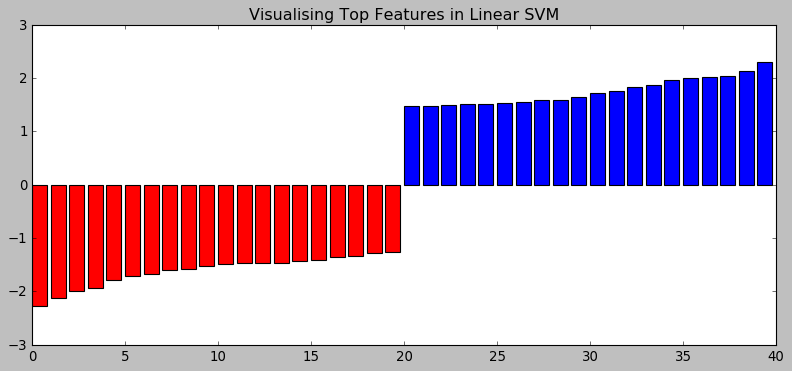

In [176]:
# create plot
plt.figure(figsize=(12, 5))
colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * 20), coef[top_coefficients], color=colors)
feature_names = np.array(X_train_tokens)
#plt.xticks(np.arange(1, 1 + 2 * 20), feature_names[top_coefficients], rotation=60, ha='right')
plt.title('Visualising Top Features in Linear SVM')
plt.show()

In [177]:
Dismissed = nb.feature_count_[0,:]
Dismissed

array([0.68853291, 0.33512832, 4.20409387, ..., 0.1303541 , 0.        ,
       0.        ])

In [178]:
Won = nb.feature_count_[1,:]
Won

array([14.14781547,  1.70572383, 20.25823591, ...,  0.95158435,
        0.84172731,  1.65149084])

## By Adding State One hot Encoding

In [180]:
X = df_cleaned.text
y = df_cleaned.Labelenc

In [181]:
X_train_txt, X_test_txt, y_train, y_test,getdumm_train,getdumm_test = train_test_split(X, y,getdumm,test_size=0.2, random_state=1)

In [182]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,4),lowercase=True,min_df=40,max_features=5000)
X_dtm_train = tfidf_vec.fit_transform((X_train_txt))
X_dtm_train.shape

(1661, 3296)

In [183]:
dense = X_dtm_train.todense()
#getdumm_train = getdumm_train.reshape(-1,1)
final_train_dtm = np.append(dense,getdumm_train,1)

In [184]:
X_dtm_test = tfidf_vec.transform(X_test_txt)
X_dtm_test.shape

(416, 3296)

In [185]:
svcclassifier = SVC(random_state=0,kernel='linear')
svcclassifier.fit(final_train_dtm,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [186]:
dense = X_dtm_test.todense()
#getdumm_train = getdumm_train.reshape(-1,1)
final_test_dtm = np.append(dense,getdumm_test,1)

In [187]:
svcclassifier.score(final_train_dtm,y_train)

0.9494280553883203

In [188]:
y_pred_svm = svcclassifier.predict(final_test_dtm)

In [189]:
print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
print('SVM CLASSIFIER CONFUSTION MATRIX:',metrics.confusion_matrix(y_test,y_pred_svm))
print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm,average=None))
print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm,average=None))
print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm,average=None))
print("===> **SVM ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_svm,average=None))


SVM ACCURACY: 0.8990384615384616
SVM CLASSIFIER CONFUSTION MATRIX: [[ 51  29]
 [ 13 323]]
===> **SVM F1 SCORE [0.70833333 0.93895349]
===> **SVM Recall SCORE [0.6375     0.96130952]
===> **SVM Precision SCORE [0.796875   0.91761364]
===> **SVM ROC_AUC SCORE 0.7994047619047618


## LSTM Neural Network

In [190]:
X = df_cleaned.text

In [191]:
y = df_cleaned.Labelenc

In [192]:
X_train_txt, X_test_txt, y_train, y_test, = train_test_split(X, y,test_size=0.2, random_state=1)

In [193]:
from keras.datasets import imdb
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras import callbacks
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence


C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [194]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review
tok = Tokenizer(num_words=vocab_size)
tok.fit_on_texts(X_train_txt)
sequences_train = tok.texts_to_sequences(X_train_txt)
sequences_test = tok.texts_to_sequences(X_test_txt)
#load dataset as a list of ints
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
x_train = sequence.pad_sequences(sequences_train, maxlen=maxlen)
x_test =  sequence.pad_sequences(sequences_test, maxlen=maxlen)

In [195]:
x_train.shape

(1661, 300)

In [196]:
x_test.shape

(416, 300)

In [197]:
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, 128))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
#lstm_model.add(Flatten())
#lstm_model.add(Dense(250, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0,
                                         patience=2, verbose=0, mode='auto')

# Compile and train.
lstm_model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [198]:
lstm_model.fit(x_train, y_train, batch_size=64, epochs=20,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

loss, acc = lstm_model.evaluate(x_test, y_test, batch_size=64)

print('Test loss (LOWER is better)      :', loss)
print('Test accuracy (HIGHER is better) :', acc)

Train on 1661 samples, validate on 416 samples
Epoch 1/20
1661/1661 [==============================] - 47s 28ms/step - loss: 0.5478 - acc: 0.7875 - val_loss: 0.4482 - val_acc: 0.8077
Epoch 2/20
1661/1661 [==============================] - 41s 25ms/step - loss: 0.4388 - acc: 0.8031 - val_loss: 0.4014 - val_acc: 0.8125
Epoch 3/20
1661/1661 [==============================] - 43s 26ms/step - loss: 0.3574 - acc: 0.8435 - val_loss: 0.3538 - val_acc: 0.8317
Epoch 4/20
1661/1661 [==============================] - 44s 27ms/step - loss: 0.2795 - acc: 0.8928 - val_loss: 0.3280 - val_acc: 0.8413
Epoch 5/20
1661/1661 [==============================] - 46s 28ms/step - loss: 0.1984 - acc: 0.9235 - val_loss: 0.3746 - val_acc: 0.8389
Epoch 6/20
416/416 [==============================] - 1s 3ms/step
Test loss (LOWER is better)      : 0.3715188503265381
Test accuracy (HIGHER is better) : 0.8605769230769231


In [199]:
lstm_pred = lstm_model.predict_classes(x_test)

In [200]:
lstm_pred = lstm_pred

In [201]:
#lstm_pred

In [204]:
print("LSTM ACCURACY:",metrics.accuracy_score(y_test,lstm_pred))
print('LSTM CLASSIFIER CONFUSTION MATRIX:',metrics.confusion_matrix(y_test,lstm_pred))
print("===> **LSTM F1 SCORE",metrics.f1_score(y_test, lstm_pred,average=None))
print("===> **LSTM Recall SCORE",metrics.recall_score(y_test, lstm_pred,average=None))
print("===> **LSTM Precision SCORE",metrics.precision_score(y_test, lstm_pred,average=None))
print("===> **LSTM ROC_AUC SCORE",metrics.roc_auc_score(y_test, lstm_pred,average=None))
print("#######################################################################################")

LSTM ACCURACY: 0.8605769230769231
LSTM CLASSIFIER CONFUSTION MATRIX: [[ 38  42]
 [ 16 320]]
===> **LSTM F1 SCORE [0.56716418 0.91690544]
===> **LSTM Recall SCORE [0.475      0.95238095]
===> **LSTM Precision SCORE [0.7037037 0.8839779]
===> **LSTM ROC_AUC SCORE 0.7136904761904761
#######################################################################################
